In [6]:
import pandas as pd

# Placeholder file paths for your provided data files
nba_path = '/workspaces/Data-Science-Final-Project/NBA/data/nba_ou_trends_all_teams.csv'     # Replace with actual NBA O/U file path
nfl_path = '/workspaces/Data-Science-Final-Project/NBA/data/nfl_ou_trends.csv'     # Replace with actual NFL O/U file path
mlb_path = '/workspaces/Data-Science-Final-Project/NBA/data/MLB_Over_Under.csv'     # Replace with actual MLB O/U file path

# Load datasets
nba_df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/nba_ou_trends_all_teams.csv")
nfl_df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/nfl_ou_trends.csv")
mlb_df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/MLB_Over_Under.csv")

# Extract relevant info (assuming structure: Team,Over Record,Over,Under,Total +/-)
nba_team = nba_df.iloc[0]
nfl_team = nfl_df.iloc[0]
mlb_team = mlb_df.iloc[0]

# Create a unified DataFrame for plotting and analysis
data = {
    'League': ['NBA', 'NFL', 'MLB'],
    'Team': [nba_team['Team'], nfl_team['Team'], mlb_team['Team']],
    'Over_PCT': [float(nba_team['Over']), float(nfl_team['Over']), float(mlb_team['Over'])],
    'Under_PCT': [float(nba_team['Under']), float(nfl_team['Under']), float(mlb_team['Under'])],
    'Total_Diff': [float(nba_team['Total_+/-']), float(nfl_team['Total_+/-']), float(mlb_team['Total_+/-'])]
}

df_combined = pd.DataFrame(data)
from IPython.display import display
display(df_combined)


,League,Team,Over_PCT,Under_PCT,Total_Diff
0,NBA,Washington,51.1,48.9,0.8
1,NFL,Detroit,55.4,44.6,2.0
2,MLB,Miami,58.9,41.1,1.1


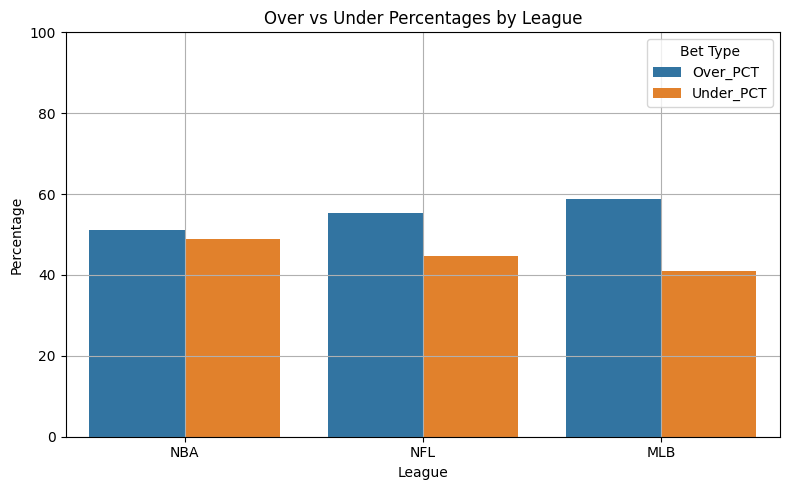

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
data = {
    'League': ['NBA', 'NFL', 'MLB'],
    'Team': ['Washington', 'Detroit', 'Miami'],
    'Over_PCT': [51.1, 55.4, 58.9],
    'Under_PCT': [48.9, 44.6, 41.1],
    'Total_Diff': [0.8, 2.0, 1.1]
}

df = pd.DataFrame(data)

# Melt the data for grouped bar chart
melted = df.melt(id_vars=['League'], value_vars=['Over_PCT', 'Under_PCT'], 
                 var_name='Type', value_name='Percent')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x='League', y='Percent', hue='Type')
plt.title('Over vs Under Percentages by League')
plt.ylabel('Percentage')
plt.xlabel('League')
plt.ylim(0, 100)
plt.legend(title='Bet Type')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_44528/2994713070.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='League', y='Total_Diff', palette='viridis')


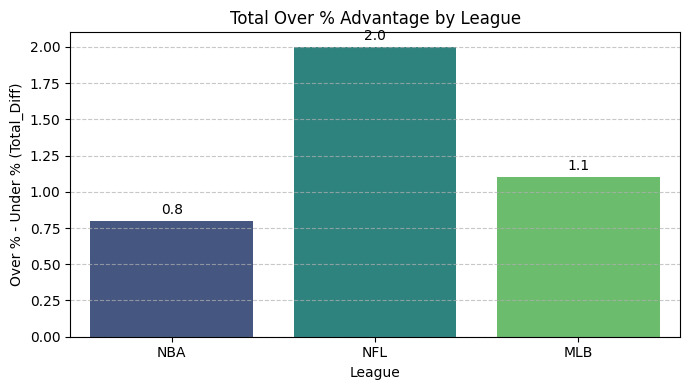

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'League': ['NBA', 'NFL', 'MLB'],
    'Team': ['Washington', 'Detroit', 'Miami'],
    'Over_PCT': [51.1, 55.4, 58.9],
    'Under_PCT': [48.9, 44.6, 41.1],
    'Total_Diff': [0.8, 2.0, 1.1]
}

df = pd.DataFrame(data)

# Bar plot for Total_Diff
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='League', y='Total_Diff', palette='viridis')

# Annotate values on bars
for index, row in df.iterrows():
    plt.text(index, row['Total_Diff'] + 0.05, f"{row['Total_Diff']:.1f}", ha='center')

plt.title('Total Over % Advantage by League')
plt.ylabel('Over % - Under % (Total_Diff)')
plt.xlabel('League')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
